# ML2 2.5 - Visual Applications of Machine Learning

### This script contains the following:

#### 1. Importing Libraries
#### 2. Handwriting Recognition
        Practice
        Using Personal Handwritten Numbers
            Importing Handwritten Numbers
        GreyScale and Resizing Images 0-9
        Predicting the Class
#### 3. Radar Recognition
        Import new libraries
        Setting up Radar Recognition


### 1. Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [3]:
# Creating Path

path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning'

In [5]:
path

'D:\\Career Foundry\\3) Data Specialization\\Machine Learning with Python\\Achievement 2 - Real-World Application of Machine Learning'

### 2. Handwriting Recognition

#### Practice

In [13]:
tf.random.set_seed(42)

In [15]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [19]:
(X_train, y_train), (X_test, y_test) = hand

In [21]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [23]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

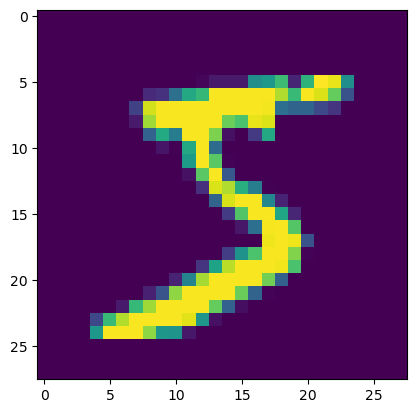

In [29]:
# Showing the images in the database

plt.imshow(X_train[0])

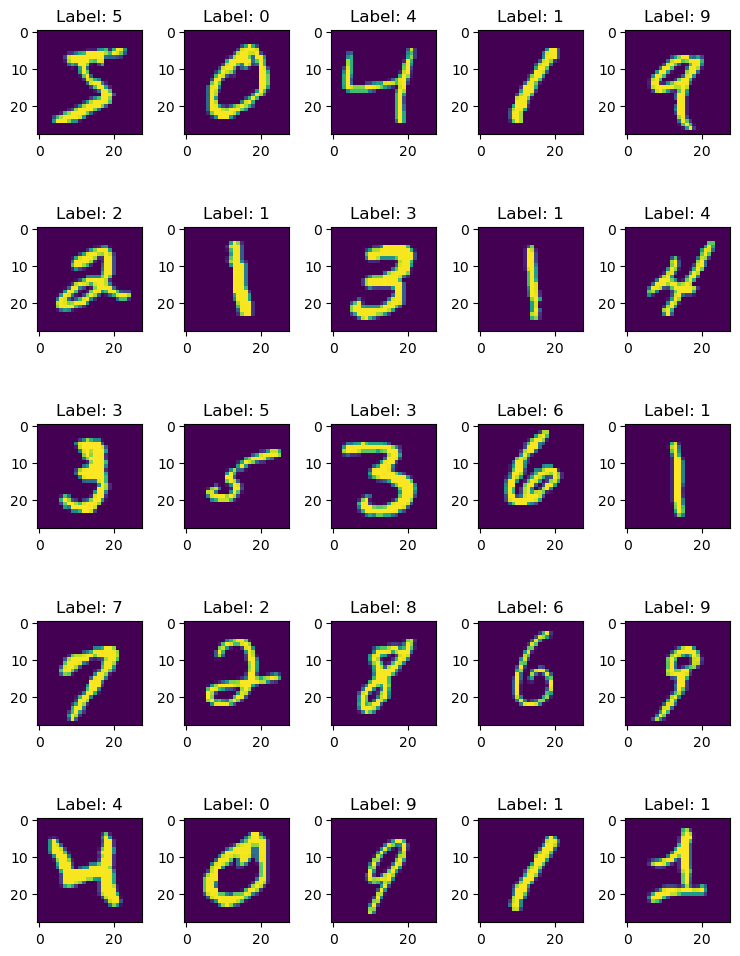

In [31]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [33]:
# Preprocess input data

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [35]:
# Converting data into floats, for decimal implementation

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [37]:
# Dividing by 255 because RGB have 255 values

X_train /= 255
X_test /= 255

In [41]:
#  Preprocess class labels (changing to one-hot encoding)

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [43]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [45]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [51]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
# Fit model on training data

model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8745 - loss: 0.3954
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9731 - loss: 0.0905
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0688
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0561
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0483
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9875 - loss: 0.0418
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0354
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9905 - loss: 0.0293
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9912 - loss: 0.0268


In [55]:
# Evaluate model on test data

score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9901 - loss: 0.0377


In [57]:
# Predict first 4 images in the test set

model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[1.18850869e-14, 4.52472920e-11, 4.57712712e-09, 1.04323654e-07,
        2.28293513e-12, 2.11277054e-13, 1.83228115e-20, 9.99999881e-01,
        8.28766255e-13, 3.88041776e-09],
       [2.45749466e-13, 4.46357664e-12, 1.00000000e+00, 2.03022812e-17,
        2.45014496e-18, 4.85335115e-24, 3.67239442e-12, 2.89348109e-18,
        3.97527906e-18, 3.34104772e-21],
       [2.32982550e-10, 9.99999881e-01, 1.53241846e-08, 1.25291874e-10,
        1.18838086e-08, 3.74758935e-09, 3.87343242e-08, 3.64976245e-08,
        9.04171316e-08, 3.63558716e-09],
       [9.99997735e-01, 1.92283429e-12, 1.56979249e-10, 3.10331925e-12,
        1.14771317e-11, 2.71677431e-10, 2.31500348e-06, 2.00032890e-11,
        7.77925224e-11, 2.93967606e-09]], dtype=float32)

In [59]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([1.       , 1.       , 1.0000001, 1.       ], dtype=float32)

In [61]:
# Actual results for first 4 images in test set

y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [63]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 974    0    0    0    0    0    4    0    1    1]
 [   0 1131    1    0    0    1    1    0    1    0]
 [   1    3 1022    2    0    0    0    4    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    1    0  969    0    3    0    3    6]
 [   0    0    1    4    0  885    2    0    0    0]
 [   2    1    0    1    1    3  949    0    1    0]
 [   0    1    7    0    1    0    0 1017    1    1]
 [   1    1    1    1    0    0    0    1  968    1]
 [   0    1    0    4    2   12    1    4    5  980]]


#### Using Personal Handwritten Numbers

##### Importing my personal handwritten numbers 0-9

PNG
(261, 211)
RGBA


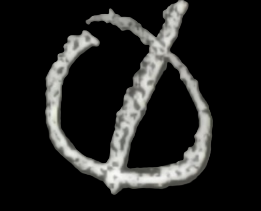

In [562]:
img0 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 0.png'))
print(img0.format)
print(img0.size)
print(img0.mode)
img0

PNG
(224, 202)
RGBA


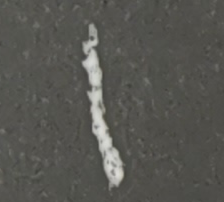

In [564]:
img1 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 1.png'))
print(img1.format)
print(img1.size)
print(img1.mode)
img1

PNG
(228, 222)
RGBA


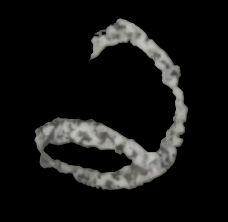

In [566]:
img2 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 2.png'))
print(img2.format)
print(img2.size)
print(img2.mode)
img2

PNG
(264, 232)
RGBA


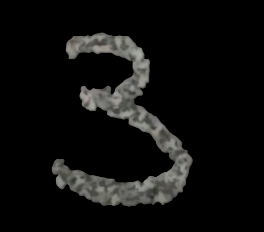

In [568]:
img3 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 3.png'))
print(img3.format)
print(img3.size)
print(img3.mode)
img3

PNG
(237, 202)
RGBA


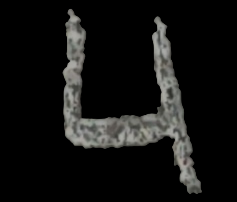

In [572]:
img4 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 4.png'))
print(img4.format)
print(img4.size)
print(img4.mode)
img4

PNG
(236, 229)
RGBA


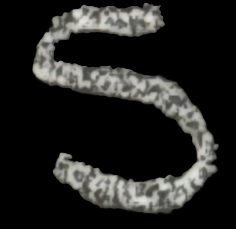

In [574]:
img5 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 5.png'))
print(img5.format)
print(img5.size)
print(img5.mode)
img5

PNG
(235, 205)
RGBA


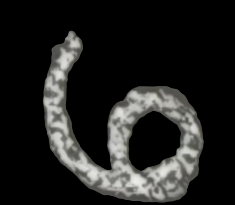

In [576]:
img6 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 6.png'))
print(img6.format)
print(img6.size)
print(img6.mode)
img6

PNG
(229, 264)
RGBA


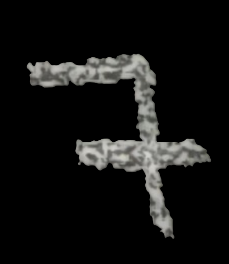

In [578]:
img7 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 7.png'))
print(img7.format)
print(img7.size)
print(img7.mode)
img7

PNG
(257, 259)
RGBA


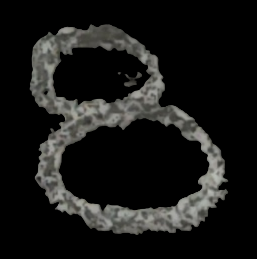

In [580]:
img8 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 8.png'))
print(img8.format)
print(img8.size)
print(img8.mode)
img8

PNG
(300, 254)
RGBA


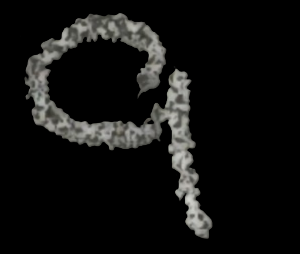

In [582]:
img9 = Image.open(os.path.join(path, 'ClimateWins', 'Python Numbers', 'Number 9.png'))
print(img9.format)
print(img9.size)
print(img9.mode)
img9

#### GreyScale and Resizing Images 0-9 

IMG0

In [528]:
img0_size = img0.resize((28, 28))

In [530]:
img0_grey = img0_size.convert('L')

In [532]:
img0_np = np.array(img0_grey)

In [534]:
img0_np = img0_np / 255.0

In [536]:
img0_new = img0_np.reshape(1, 28, 28, 1)

In [538]:
print(img0_new.shape)

(1, 28, 28, 1)


IMG1

In [410]:
img1_size = img1.resize((28, 28))

In [412]:
img1_grey = img1_size.convert('L')

In [414]:
img1_np = np.array(img1_grey)

In [416]:
img1_np = img1_np / 255.0

In [418]:
img1_new = img1_np.reshape(1, 28, 28, 1)

In [420]:
print(img1_new.shape)

(1, 28, 28, 1)


IMG2

In [422]:
img2_size = img2.resize((28, 28))

In [424]:
img2_grey = img2_size.convert('L')

In [426]:
img2_np = np.array(img2_grey)

In [428]:
img2_np = img2_np / 255.0

In [430]:
img2_new = img2_np.reshape(1, 28, 28, 1)

In [432]:
print(img2_new.shape)

(1, 28, 28, 1)


IMG3

In [434]:
img3_size = img3.resize((28, 28))

In [436]:
img3_grey = img3_size.convert('L')

In [438]:
img3_np = np.array(img3_grey)

In [440]:
img3_np = img3_np / 255.0

In [442]:
img3_new = img3_np.reshape(1, 28, 28, 1)

In [444]:
print(img3_new.shape)

(1, 28, 28, 1)


IMG4

In [446]:
img4_size = img4.resize((28, 28))

In [448]:
img4_grey = img4_size.convert('L')

In [450]:
img4_np = np.array(img4_grey)

In [452]:
img4_np = img4_np / 255.0

In [454]:
img4_new = img4_np.reshape(1, 28, 28, 1)

In [456]:
print(img4_new.shape)

(1, 28, 28, 1)


IMG5

In [458]:
img5_size = img5.resize((28, 28))

In [460]:
img5_grey = img5_size.convert('L')

In [462]:
img5_np = np.array(img5_grey)

In [464]:
img5_np = img5_np / 255.0

In [466]:
img5_new = img5_np.reshape(1, 28, 28, 1)

In [468]:
print(img5_new.shape)

(1, 28, 28, 1)


IMG6

In [470]:
img6_size = img6.resize((28, 28))

In [472]:
img6_grey = img6_size.convert('L')

In [474]:
img6_np = np.array(img6_grey)

In [476]:
img6_np = img6_np / 255.0

In [478]:
img6_new = img6_np.reshape(1, 28, 28, 1)

In [480]:
print(img6_new.shape)

(1, 28, 28, 1)


IMG87

In [482]:
img7_size = img7.resize((28, 28))

In [484]:
img7_grey = img7_size.convert('L')

In [486]:
img7_np = np.array(img7_grey)

In [488]:
img7_np = img7_np / 255.0

In [490]:
img7_new = img7_np.reshape(1, 28, 28, 1)

In [492]:
print(img7_new.shape)

(1, 28, 28, 1)


IMG8

In [494]:
img8_size = img8.resize((28, 28))

In [496]:
img8_grey = img8_size.convert('L')

In [498]:
img8_np = np.array(img8_grey)

In [500]:
img8_np = img8_np / 255.0

In [502]:
img8_new = img8_np.reshape(1, 28, 28, 1)

In [504]:
print(img8_new.shape)

(1, 28, 28, 1)


IMG9

In [506]:
img9_size = img9.resize((28, 28))

In [508]:
img9_grey = img9_size.convert('L')

In [510]:
img9_np = np.array(img9_grey)

In [512]:
img9_np = img9_np / 255.0

In [514]:
img9_new = img9_np.reshape(1, 28, 28, 1)

In [516]:
print(img9_new.shape)

(1, 28, 28, 1)


In [ ]:
#testimg0 = asarray(img0)
#print(testimg0.shape)
(28, 28, 4)
#testimg0 = testimg0.reshape(1, 28, 28, 1)
ValueError                       Traceback (most recent call last)
Cell In[137], line 1
----> #1 test_img0 = testimg0.reshape(28, 28, 1)
ValueError: cannot reshape array of size 3136 into shape (28,28,1)

##### In the portion of code above, I was trying to test the image array and reshape them. Although I tried to greyscale my images prior to loading them into python, I was met with an error. My images were not greyscale and I must manually greyscale them inside python. I have to go back to the original file and gray scale them before turning them into numpy-arrays. I'll leave this error portion of the script here.

#### Predicting the Class

In [540]:
# Predict the class

predict_value = model.predict(img0_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6


In [542]:
predict_value = model.predict(img1_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8


In [544]:
predict_value = model.predict(img2_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3


In [546]:
predict_value = model.predict(img3_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3


In [548]:
predict_value = model.predict(img4_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6


In [550]:
predict_value = model.predict(img5_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3


In [552]:
predict_value = model.predict(img6_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6


In [554]:
predict_value = model.predict(img7_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7


In [556]:
predict_value = model.predict(img8_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3


In [558]:
predict_value = model.predict(img9_new)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4


#### Based on the predictions of my handwritten numbers the algorithm only got 3 correct (3, 6, 7). The mistakes it made that I could understand were for numbers: 0, 8 , 9. The algorithm said 0 was 6, 8 was 3 and 9 was 4. The other numbers I don't understand why it chose the digits it did. But it's interesting to see it work with a few of my hand written values. There was only 30% accuracy.

### 3. Radar Recognition

#### Import new libraries

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import clear_output
from keras.optimizers import Adam
from keras.layers import Conv2D, BatchNormalization, Input, GlobalAveragePooling2D, Dense, Reshape, LeakyReLU
from keras.models import Model, Sequential
from keras.layers import Conv2DTranspose

#### Setting up Radar Recognition

In [10]:
# function for building the discriminator layers
def build_discriminator(start_filters, spatial_dim, filter_size):
        
    # function for building a CNN block for downsampling the image
    def add_discriminator_block(x, filters, filter_size):
        x = Conv2D(filters, filter_size, padding='same')(x)
        x = BatchNormalization()(x)
        x = Conv2D(filters, filter_size, padding='same', strides=2)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(0.2)(x) #Can try other values
        return x
    
    # input is an image with shape spatial_dim x spatial_dim and 3 channels
    inp = Input(shape=(spatial_dim, spatial_dim, 3))

    # design the discrimitor to downsample the image 4x
    x = add_discriminator_block(inp, start_filters, filter_size)
    x = add_discriminator_block(x, start_filters * 2, filter_size)
    x = add_discriminator_block(x, start_filters * 4, filter_size)
    x = add_discriminator_block(x, start_filters * 8, filter_size)
    
    # average and return a binary output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='sigmoid')(x) #Can also try sigmoid
    
    return Model(inputs=inp, outputs=x)

In [12]:
def build_generator(start_filters, filter_size, latent_dim):
          
    # function for building a CNN block for upsampling the image
    def add_generator_block(x, filters, filter_size):
        x = Conv2DTranspose(filters, filter_size, strides=2, padding='same')(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(0.2)(x) #Can try other values
        return x

    # input is a noise vector 
    inp = Input(shape=(latent_dim,))

    # projection of the noise vector into a tensor with 
    # same shape as last conv layer in discriminator
    x = Dense(4 * 4 * (start_filters * 8), input_dim=latent_dim)(inp)
    x = BatchNormalization()(x)
    x = Reshape(target_shape=(4, 4, start_filters * 8))(x)

    # design the generator to upsample the image 4x
    x = add_generator_block(x, start_filters * 4, filter_size)
    x = add_generator_block(x, start_filters * 2, filter_size)
    x = add_generator_block(x, start_filters, filter_size)
    x = add_generator_block(x, start_filters, filter_size)    

    # turn the output into a 3D tensor, an image with 3 channels 
    x = Conv2D(3, kernel_size=5, padding='same', activation='tanh')(x) #tanh
  
    return Model(inputs=inp, outputs=x)

In [14]:
weather_path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\DataSet\Radar Recognition Data\Multi-class Weather Dataset'

In [16]:
# This is a list of the class names for the images downloaded from Kaggle.(which are also the folder names)
# https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset?select=Multi-class+Weather+Dataset

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [18]:
# We will manually create a DataFrame that looks like a loaded CSV file
# This is a list to hold all file paths and labels

data = []

In [20]:
# Loop through each class folder to get the file paths

for class_name in class_names:
    folder_path = os.path.join(weather_path, class_name) 

# List all the files in the current folder

    for image_file in os.listdir(folder_path):
        # We need to make sure we're only getting image files
        if image_file.endswith(('.jpg', '.jpeg')):
            full_path = os.path.join(folder_path, image_file)
            # Add a dictionary with the file path and its label to our list
            data.append({'image_path': full_path, 'label': class_name})

In [22]:
# Now we create the DataFrame from our list

weather_images = pd.DataFrame(data)

In [24]:
# Let's see the first few rows of the DataFrame to confirm it looks right

print("DataFrame created with file paths and labels:")
print(weather_images.head())

DataFrame created with file paths and labels:
                                          image_path   label
0  D:\Career Foundry\3) Data Specialization\Machi...  Cloudy
1  D:\Career Foundry\3) Data Specialization\Machi...  Cloudy
2  D:\Career Foundry\3) Data Specialization\Machi...  Cloudy
3  D:\Career Foundry\3) Data Specialization\Machi...  Cloudy
4  D:\Career Foundry\3) Data Specialization\Machi...  Cloudy


In [26]:
# Now we can continue using this DataFrame

TOTAL_SAMPLES = weather_images.shape[0]
print(f"\nTOTAL_SAMPLES is now: {TOTAL_SAMPLES}")


TOTAL_SAMPLES is now: 1125


In [28]:
# we will downscale the images
SPATIAL_DIM = 64 

# size of noise vector
LATENT_DIM_GAN = 100 

# filter size in conv layer
FILTER_SIZE = 5

# number of filters in conv layer
NET_CAPACITY = 16

# batch size
BATCH_SIZE_GAN = 32

# interval for displaying generated images
PROGRESS_INTERVAL = 80 

# directory for storing generated images
ROOT_DIR = 'visualization'
if not os.path.isdir(ROOT_DIR):
    os.mkdir(ROOT_DIR)

def construct_models(verbose=False):
    ### discriminator
    discriminator = build_discriminator(NET_CAPACITY, SPATIAL_DIM, FILTER_SIZE)
    # compile discriminator
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['mae']) #Can try other values for lr

    ### generator
    # do not compile generator
    generator = build_generator(NET_CAPACITY, FILTER_SIZE, LATENT_DIM_GAN)

    ### DCGAN 
    gan = Sequential()
    gan.add(generator)
    gan.add(discriminator)
    discriminator.trainable = False 
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['mae']) #Can try other values for lr

    if verbose: 
        generator.summary()
        discriminator.summary()
        gan.summary()
        
    return generator, discriminator, gan
  
generator_weather_images, discriminator_weather_images, gan_weather_images = construct_models(verbose=True)

C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │         206,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 64)            │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 16)          │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64, 64, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 3)           │           1,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 492,083 (1.88 MB)

 Trainable params: 487,731 (1.86 MB)

 Non-trainable params: 4,352 (17.00 KB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 816,529 (3.11 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 816,529 (3.11 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)            │ (None, 64, 64, 3)           │         492,083 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional (Functional)              │ (None, 1)                   │         816,529 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,308,612 (4.99 MB)

 Trainable params: 487,731 (1.86 MB)

 Non-trainable params: 820,881 (3.13 MB)

Epoch 199


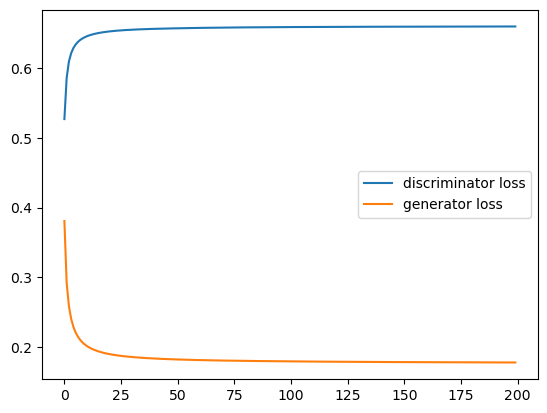

In [30]:
# number of discriminator updates per alternating training iteration

DISC_UPDATES = 1  #Can try other values 
# number of generator updates per alternating training iteration
GEN_UPDATES = 2 #Can try other values

# function for training a GAN
def run_training(generator, discriminator, gan, weather_images, start_it=0, num_epochs=1000):
        
    # helper function for selecting 'size' real images
    # and downscaling them to lower dimension SPATIAL_DIM
    def get_real_images(weather_images, size, total): #get_real_weather
        cur_files = weather_images.sample(frac=1).iloc[0:size]
        X = np.empty(shape=(size, SPATIAL_DIM, SPATIAL_DIM, 3))
        for i in range(0, size):
            file_path = cur_files.iloc[i]['image_path']
            img = Image.open(file_path)
            img = img.resize((SPATIAL_DIM, SPATIAL_DIM))
            img = img.convert('RGB')
            img = np.array(img)
            img = img.astype(np.float32) / 127.5 - 1.0
            X[i] = img
        return X
  
    # list for storing loss
    avg_loss_discriminator = []
    avg_loss_generator = []
    total_it = start_it

    # main training loop
    for epoch in range(num_epochs):
        
        # alternating training loop
        loss_discriminator = []
        loss_generator = []
        for it in range(200): 
            
            #### Discriminator training loop ####
            for i in range(DISC_UPDATES): 
                # select a random set of real images
                imgs_real = get_real_images(weather_images, BATCH_SIZE_GAN, TOTAL_SAMPLES)
                # generate a set of random noise vectors
                noise = np.random.randn(BATCH_SIZE_GAN, LATENT_DIM_GAN)
                # generate a set of fake images using the generator
                imgs_fake = generator.predict(noise)
                # train the discriminator on real images with label 1
                d_loss_real = discriminator.train_on_batch(imgs_real, np.ones([BATCH_SIZE_GAN]))[1]
                # train the discriminator on fake images with label 0
                d_loss_fake = discriminator.train_on_batch(imgs_fake, np.zeros([BATCH_SIZE_GAN]))[1]

            # display some fake images for visual control of convergence
            if total_it % PROGRESS_INTERVAL == 0:
                plt.figure(figsize=(5,2))
                num_vis = min(BATCH_SIZE_GAN, 5)
                imgs_real = get_real_images(weather_images, num_vis, TOTAL_SAMPLES)
                noise = np.random.randn(num_vis, LATENT_DIM_GAN)
                imgs_fake = generator.predict(noise)
                for obj_plot in [imgs_fake, imgs_real]:
                    plt.figure(figsize=(num_vis * 3, 3))
                    for b in range(num_vis):
                        disc_score = float(discriminator.predict(np.expand_dims(obj_plot[b], axis=0))[0])
                        plt.subplot(1, num_vis, b + 1)
                        plt.title(str(round(disc_score, 3)))
                        plt.imshow(obj_plot[b] * 0.5 + 0.5) 
                    if obj_plot is imgs_fake:
                        plt.savefig(os.path.join(ROOT_DIR, str(total_it).zfill(10) + '.jpg'), format='jpg', bbox_inches='tight')
                    plt.show()  

            #### Generator training loop ####
            loss = 0
            y = np.ones([BATCH_SIZE_GAN, 1]) 
            for j in range(GEN_UPDATES):
                # generate a set of random noise vectors
                noise = np.random.randn(BATCH_SIZE_GAN, LATENT_DIM_GAN)
                # train the generator on fake images with label 1
                loss += gan.train_on_batch(noise, y)[1]

            # store loss
            loss_discriminator.append((d_loss_real + d_loss_fake) / 2.)        
            loss_generator.append(loss / GEN_UPDATES)
            total_it += 1

        # visualize loss
        clear_output(True)
        print('Epoch', epoch)
        avg_loss_discriminator.append(np.mean(loss_discriminator))
        avg_loss_generator.append(np.mean(loss_generator))
        plt.plot(range(len(avg_loss_discriminator)), avg_loss_discriminator)
        plt.plot(range(len(avg_loss_generator)), avg_loss_generator)
        plt.legend(['discriminator loss', 'generator loss'])
        plt.show()

    return generator, discriminator, gan

generator_weather_images, discriminator_weather_images, gan_weather_images = run_training(generator_weather_images, 
                                                               discriminator_weather_images, 
                                                               gan_weather_images, 
                                                               num_epochs=200, 
                                                               weather_images=weather_images)

##### After running 200 epochs to determine if the radar recognition was reliable, I can see that the discriminator loss and the generator loss never conjoined. However, watching it from epoch 0 to epoch 200 it started from no graphs to gradually increased loss. The DL and GL never started at their points together. I feel that if I ran the epoch to 250 or 300 I could have potentially observed conjoined losses. Running 200 Epochs took about 3 hours. Trying to run 500 epoch took more than 6 hours and still didn't complete. 